# 2. PREDICTING CAR PRICES - EXPLORATORY DATA ANALYSIS
---

## 1. Getting Familiar with the Dataset

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

cars = pd.read_csv('data/imports-85.cars')
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,138.000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,1,138.500,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,2,164.000,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,2,164.000,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,2,143.545,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


In [2]:
cars.shape

(204, 26)

## 2. Exploring the Correlation

<AxesSubplot:>

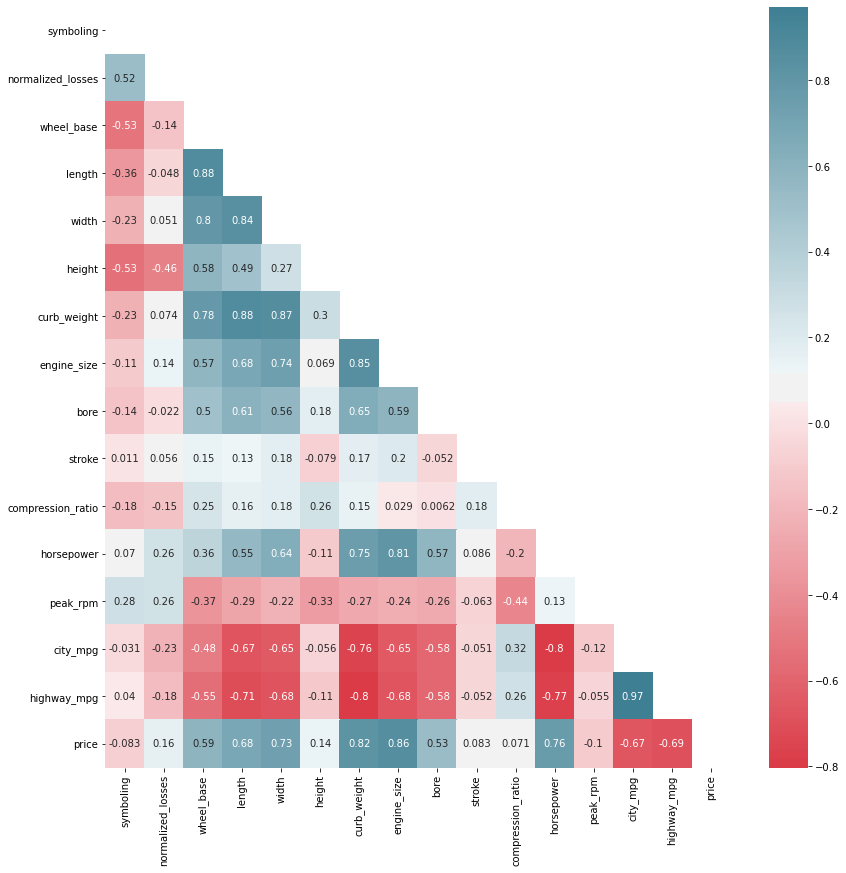

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = cars.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, mask=mask, cmap=color, annot=True)

It looks like there are some attributes that show a strong positive or negative linear correlation with the price. Let's look at the correlation matrix and explore the best:

In [4]:
corr_matrix = cars.corr().abs()
corr_matrix["price"].sort_values(ascending=False)

price                1.000
engine_size          0.862
curb_weight          0.821
horsepower           0.759
width                0.730
highway_mpg          0.691
length               0.683
city_mpg             0.668
wheel_base           0.588
bore                 0.533
normalized_losses    0.156
height               0.136
peak_rpm             0.102
symboling            0.083
stroke               0.083
compression_ratio    0.071
Name: price, dtype: float64

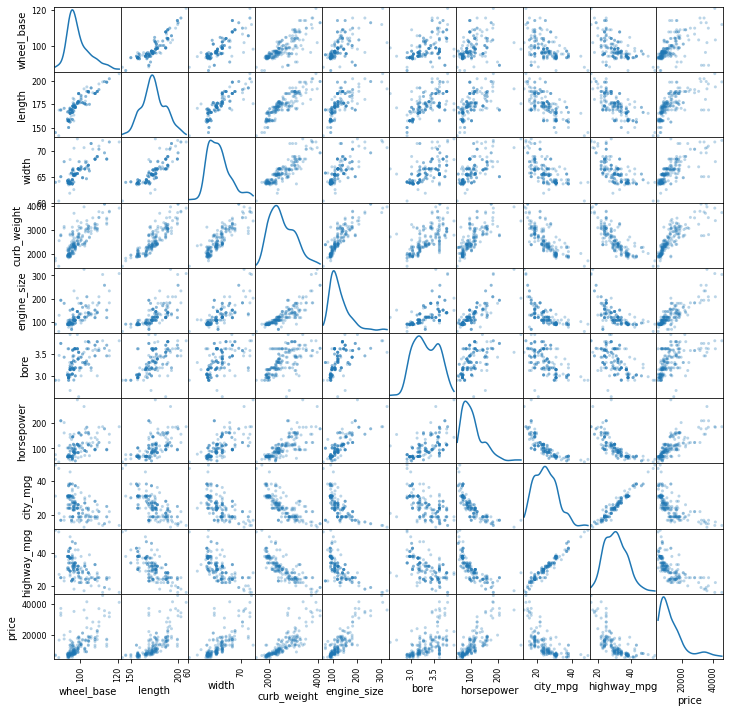

In [5]:
from pandas.plotting import scatter_matrix

corr_cols = ['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 
             'bore', 'horsepower', 'city_mpg', 'highway_mpg', 'price']
scatter_matrix(cars[corr_cols], figsize=(12, 12), alpha=0.3, diagonal='kde')
plt.show()

If we look at the bottom of the scatter plot above, we see that the correlation with the price is indeed strong. However, one can't help but think that there might be a couple more columns that were left out that would maybe show some correlation. For example, `num_doors` and `num_cylinders`. Let's convert them to numerical data and see what happens.

## 3. Exploring more Features for Correlation

In [6]:
cars_corr2 = cars[['num_doors', 'num_cylinders', 'price']].copy()
cars_corr2.head()

,num_doors,num_cylinders,price
0,two,four,16500.0
1,two,six,16500.0
2,four,four,13950.0
3,four,five,17450.0
4,two,five,15250.0


In [7]:
print(cars_corr2['num_doors'].unique())
print(cars_corr2['num_cylinders'].unique())

['two' 'four']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [8]:
str_int = {'two': 2,
          'three': 3, 
          'four': 4,
          'five':5,
          'six': 6,
          'eight': 8,
          'twelve': 12
          }
cars_corr2['n_doors'] = [str_int[item] for item in cars_corr2['num_doors']]
cars_corr2['n_cylinders'] = [str_int[item] for item in cars_corr2['num_cylinders']]
cars_corr2.head()

,num_doors,num_cylinders,price,n_doors,n_cylinders
0,two,four,16500.0,2,4
1,two,six,16500.0,2,6
2,four,four,13950.0,4,4
3,four,five,17450.0,4,5
4,two,five,15250.0,2,5


In [9]:
corr2cols = ['n_doors', 'n_cylinders', 'price']
corr2_matrix = cars_corr2[corr2cols].corr()
corr2_matrix["price"].sort_values(ascending=False)

price          1.000
n_cylinders    0.688
n_doors        0.042
Name: price, dtype: float64

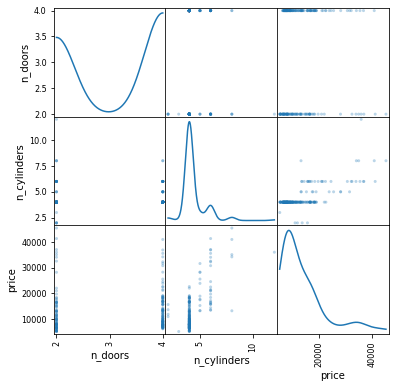

In [10]:
scatter_matrix(cars_corr2[corr2cols], figsize=(6, 6), alpha=0.3, diagonal='kde')
plt.show()

It looks like the `n_cylinders` has a great positive linear relationship with the `price`, which is not surprising considering that `engine_size` has the best correlation coefficient and usually the more the number of cylinders, the bigger the engine. We will include both `n_doors` and `n_cylinders` into our numerical columns, although one would make a case for omitting the number of cylinders since engine size gives the same or better information. 

In [11]:
cars['num_doors'] = cars_corr2['n_doors']
cars['num_cylinders'] = cars_corr2['n_cylinders']
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,138.000,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,1,138.500,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,6,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,2,164.000,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,2,164.000,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,2,143.545,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


## 4. Exploring other Columns

In [12]:
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    26
-1    22
-2     3
Name: symboling, dtype: int64

In [13]:
cars.groupby('symboling')['price'].mean()

symboling
-2    15781.667
-1    17330.682
 0    14361.528
 1     9780.396
 2    10109.281
 3    17364.615
Name: price, dtype: float64

In [14]:
cars['fuel_type'].value_counts()

gas       184
diesel     20
Name: fuel_type, dtype: int64

In [15]:
cars.groupby('fuel_type')['price'].mean()

fuel_type
diesel    15838.150
gas       12919.553
Name: price, dtype: float64

In [16]:
cars['drive_wheels'].value_counts()

fwd    120
rwd     75
4wd      9
Name: drive_wheels, dtype: int64

In [17]:
cars.groupby('drive_wheels')['price'].mean()

drive_wheels
4wd    10570.410
fwd     9310.795
rwd    19753.756
Name: price, dtype: float64

In [18]:
cars.groupby('fuel_system')['price'].mean()

fuel_system
1bbl     7555.545
2bbl     7608.127
4bbl    12145.000
idi     15838.150
mfi     12964.000
mpfi    17554.725
spdi    10990.444
spfi    11048.000
Name: price, dtype: float64

## 5. Separating Categorical from Numerical

In [19]:
cars.to_csv('data/imports-85.cars2', index=False)

num_cols = ['normalized_losses','num_doors', 'wheel_base', 'length', 'width', 
            'height', 'curb_weight', 'num_cylinders', 'engine_size', 'bore', 
            'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 
            'highway_mpg']

cat_cols = ['symboling', 'make', 'fuel_type', 'aspiration', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'fuel_system']

y_col = ['price']

cars_num = cars[num_cols]
cars_cat = cars[cat_cols]

cars_cat.head()

,symboling,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,engine_type,fuel_system
0,3,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,1,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
2,2,audi,gas,std,sedan,fwd,front,ohc,mpfi
3,2,audi,gas,std,sedan,4wd,front,ohc,mpfi
4,2,audi,gas,std,sedan,fwd,front,ohc,mpfi


In [20]:
cars_num.describe().T

,count,mean,std,min,25%,50%,75%,max
normalized_losses,204.0,121.980,32.938,65.00,94.000,117.058,143.545,256.00
num_doors,204.0,3.137,0.993,2.00,2.000,4.000,4.000,4.00
wheel_base,204.0,98.806,5.994,86.60,94.500,97.000,102.400,120.90
length,204.0,174.075,12.362,141.10,166.300,173.200,183.200,208.10
width,204.0,65.917,2.147,60.30,64.075,65.500,66.900,72.30
height,204.0,53.749,2.425,47.80,52.000,54.100,55.500,59.80
curb_weight,204.0,2555.603,521.961,1488.00,2145.000,2414.000,2939.250,4066.00
num_cylinders,204.0,4.382,1.083,2.00,4.000,4.000,4.000,12.00
engine_size,204.0,126.892,41.745,61.00,97.000,119.500,142.000,326.00
bore,204.0,3.329,0.271,2.54,3.150,3.310,3.583,3.94


In [21]:
cars_num.max() - cars_num.min()

normalized_losses     191.0
num_doors               2.0
wheel_base             34.3
length                 67.0
width                  12.0
height                 12.0
curb_weight          2578.0
num_cylinders          10.0
engine_size           265.0
bore                    1.4
stroke                  2.1
compression_ratio      16.0
horsepower            240.0
peak_rpm             2450.0
city_mpg               36.0
highway_mpg            38.0
dtype: float64

We will have to do one hot encoding for categorical attributes and some scaling for numerical attributes before training our model. That's for the next part!
`FEATURE ENGINEERING AND MODEL TRAINING`